In [16]:
from sklearn import datasets,linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
# 使用pandas读取数据
data = pd.read_csv('./data.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [13]:
X = data[['AT','V','AP','RH']]

In [14]:
y = data[['PE']]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7176, 4) (7176, 1) (2392, 4) (2392, 1)


In [18]:
linreg = LinearRegression()
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [19]:
# 开始拟合
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(linreg.intercept_)
# 模型系数
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [24]:
# 预测
y_pred = linreg.predict(X_test)

In [29]:
# 均方差和均方差根评价
from sklearn import metrics
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  20.08040120207389
RMSE:  4.481116066570235


In [31]:
# 10-fold 交叉验证
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg,X,y,cv=10)
print("MSE: ",metrics.mean_squared_error(y,predicted))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y,predicted)))

MSE:  20.7955974619431
RMSE:  4.560219014690314


In [ ]:
# 画图观察
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

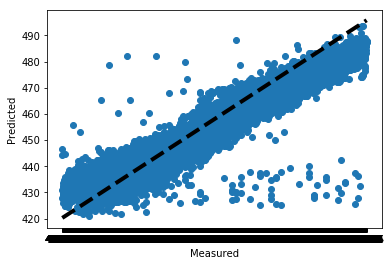

In [33]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()